<a href="https://colab.research.google.com/github/Bikomwangi/Housing-prices-prediction-model/blob/master/BIKO_MWANGI_WK_7_MORINGA_CORE_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

# Specifying the question

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

# Defining the metric for success

This project will be considered a success once we have done exhaustive data processing, Exploratory data anlysis, and developed various regression models.And, while performing the regression analysis, I will be required to perform modeling using the given regression techniques then evaluate their performance. 
The regression analysis techniques are as follows; 
- Multiple Linear Regression
- Quantile Regression
- Ridge Regression
- Lasso Regression
- Elastic Net Regression

# Reading and exploring the given dataset

In [1]:
# importing the relevan t libraries we might need for data manipulation and exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# loading the dataset
df_housing = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
df_housing.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df_housing.shape

(21613, 20)

In [4]:
# checking the columns
df_housing.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

 To understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. The Dataset glossary is as follows:
- Id 
- price  - Price of the house
- bedrooms - Number of Bedrooms
- bathrooms - Number of Bathrooms
- sqft_living - Square feet area of living area
- sqft_lot  - Square feet area of parking Layout
- floors - Number of Floors
- waterfront - Whether waterfront is there or not
- view - Number of Views
- grade - Grades
- sqft_above
- sqft_basement - Square feet area off basement
- yr_built - Year the house is built
- yr_renovated - Year the house is renovated
- zipcode - zipcode of the house
- lat : Latitude of the house
- lon : Longitude of the house
- sqft_living15: size of the living area
- sqft_lot15: size of the parking lot

In [6]:
# total missing data
total = df_housing.isnull().sum().sort_values(ascending=False)
# calculating the percentage of missing values in the dataframe
percent = (df_housing.isnull().sum()/df_housing.isnull().count()).sort_values(ascending=False)
# Making a dataframe with the missing values % and columns into a dataframe (on account of large number of rows) 
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("Missing data; ")
missing_data

Missing data; 


,Total,Percent
sqft_lot15,0,0.0
sqft_living15,0,0.0
price,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0
floors,0,0.0
waterfront,0,0.0
view,0,0.0


Our dataset has got no missing values

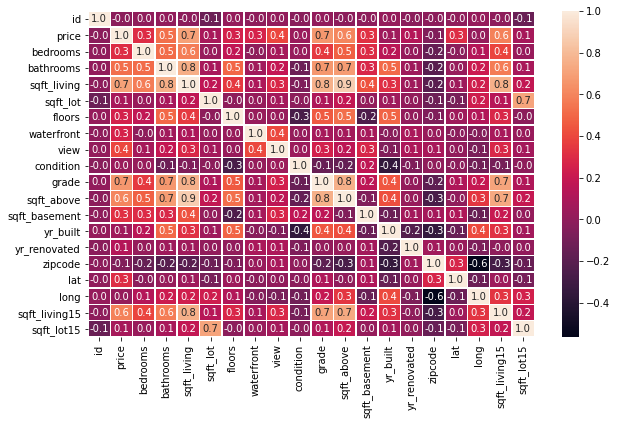

In [7]:
# observing the correlation between features using a
# correlation map
f,ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df_housing.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

- sqft_living15 and sqft_living are highly correlated with each other so I choose sqft_living
- sqft_lot15 and sqft_lot are highly correlated. I choose sqft_lot
longitude and latitude have no or rather minimum correlation with price
- bathroom is highly correlated with sqft_living
- sqft_above is highly correlated with sqft_living
- grade and sqft_living are highly correlated

In [8]:
# dropping the columns that I feel that they will be irrelavant
drop_list = ['id', 'sqft_living15', 'sqft_lot15', 'lat', 'long', 'condition', 'zipcode', 'sqft_above', 'bathrooms']
df2_housing = df_housing.drop(drop_list, axis=1)
df2_housing.head(4)

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1180,5650,1.0,0,0,7,0,1955,0
1,538000.0,3,2570,7242,2.0,0,0,7,400,1951,1991
2,180000.0,2,770,10000,1.0,0,0,6,0,1933,0
3,604000.0,4,1960,5000,1.0,0,0,7,910,1965,0


In [9]:
# order columns by correlation with price
df_corr = df2_housing.corr(method='spearman').abs()

df_corr = df_corr.sort_values('price',axis=0,ascending=False)

print(df_corr.price)
print('-----------------')

price            1.000000
grade            0.658217
sqft_living      0.644192
bedrooms         0.344653
floors           0.322349
view             0.293928
sqft_basement    0.251706
waterfront       0.115089
yr_built         0.102037
yr_renovated     0.101875
sqft_lot         0.074937
Name: price, dtype: float64
-----------------


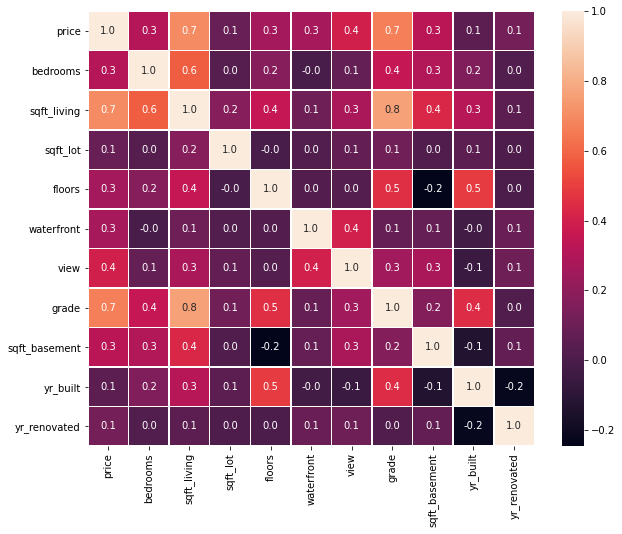

In [10]:
#correlation map
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df2_housing.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


In [11]:
df2_housing.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'view', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object')

After drop correlated features, as it can be seen in below correlation matrix, there are no more highly correlated features. 

# Using Random Forest to find the accuracy according to the chosen features

In [12]:
# split data ito train 80 % and test 20 %
from sklearn.model_selection import train_test_split
x = df2_housing[['bedrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated']]
y = df2_housing['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)


**Univariate feature selection and random forest classification**
- In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features

In [13]:
# importing libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [1.21519595e+03 4.27284348e+06 2.57880563e+08 8.81999707e+02
 4.87255109e+03 1.33131085e+04 1.87044758e+03 3.22574230e+06
 1.65564942e+03 6.31254518e+06]
Feature list: Index(['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'grade', 'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object')


select_feature.scores tell how informative is each feature for our dataset.
- The best 5 features to classify are sqtf_living, floors, waterfront, sqft_basement, yr_renovated


# Firstly, I will begin by analyzing the 'Price'.
This is because it is the reason for our quest

In [14]:
# descriptive statistics summary
df_housing['price'].describe()

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

It seems the minimum price is larger than zero.

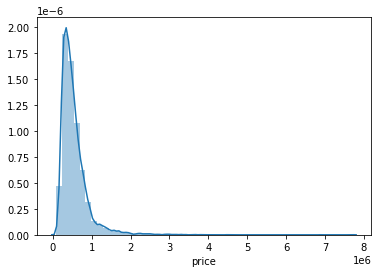

In [15]:
# histogram
sns.distplot(df_housing['price']);

According to this histogram; the prices deviate from the normal distribution, have appreciable positive skewness, and show peakedness

In [7]:
# skewness and kurtosis
print("Skewness: %f" % df_housing['price'].skew())
print("Kurtosis: %f" % df_housing['price'].kurt())

Skewness: 4.021716
Kurtosis: 34.522444


**Checking the relationship between price and the other variables**

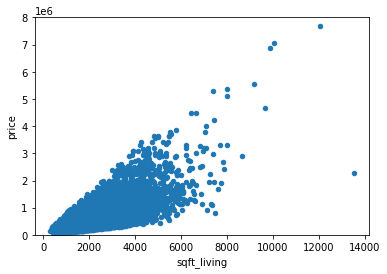

In [16]:
#scatter plot sqft_living/price
var = 'sqft_living'
data = pd.concat([df_housing['price'], df_housing[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,8000000));

It seems price and the square feet of the living area have a linear relationship.

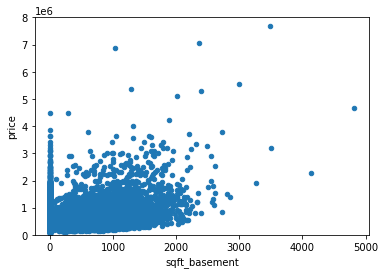

In [17]:
#scatter plot sqft_basement	/price
variable = 'sqft_basement'
data = pd.concat([df_housing['price'], df_housing[variable]], axis=1)
data.plot.scatter(x=variable, y='price', ylim=(0,8000000));

The size of the basement and price have an exponential relationship

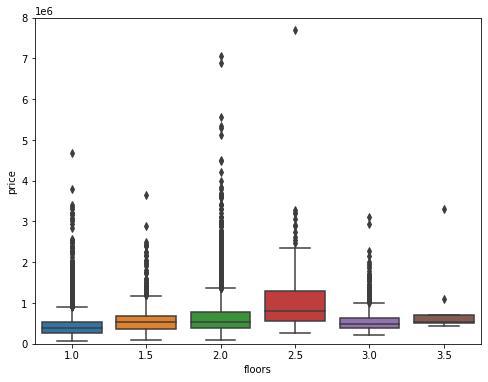

In [18]:
#box plot floors/price
var = 'floors'
data = pd.concat([df_housing['price'], df_housing[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

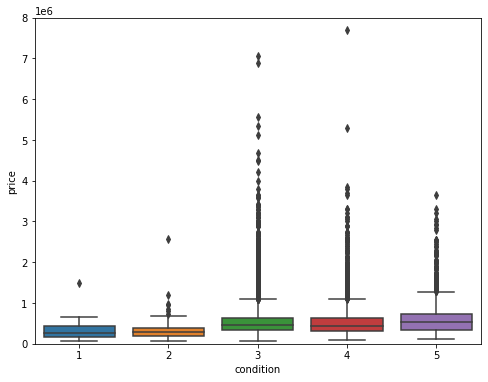

In [19]:
#box plot condition/price
var = 'condition'
data = pd.concat([df_housing['price'], df_housing[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

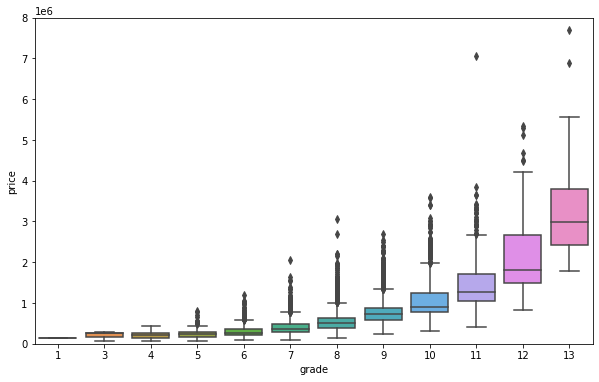

In [20]:
#box plot grade/price
var = 'grade'
data = pd.concat([df_housing['price'], df_housing[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

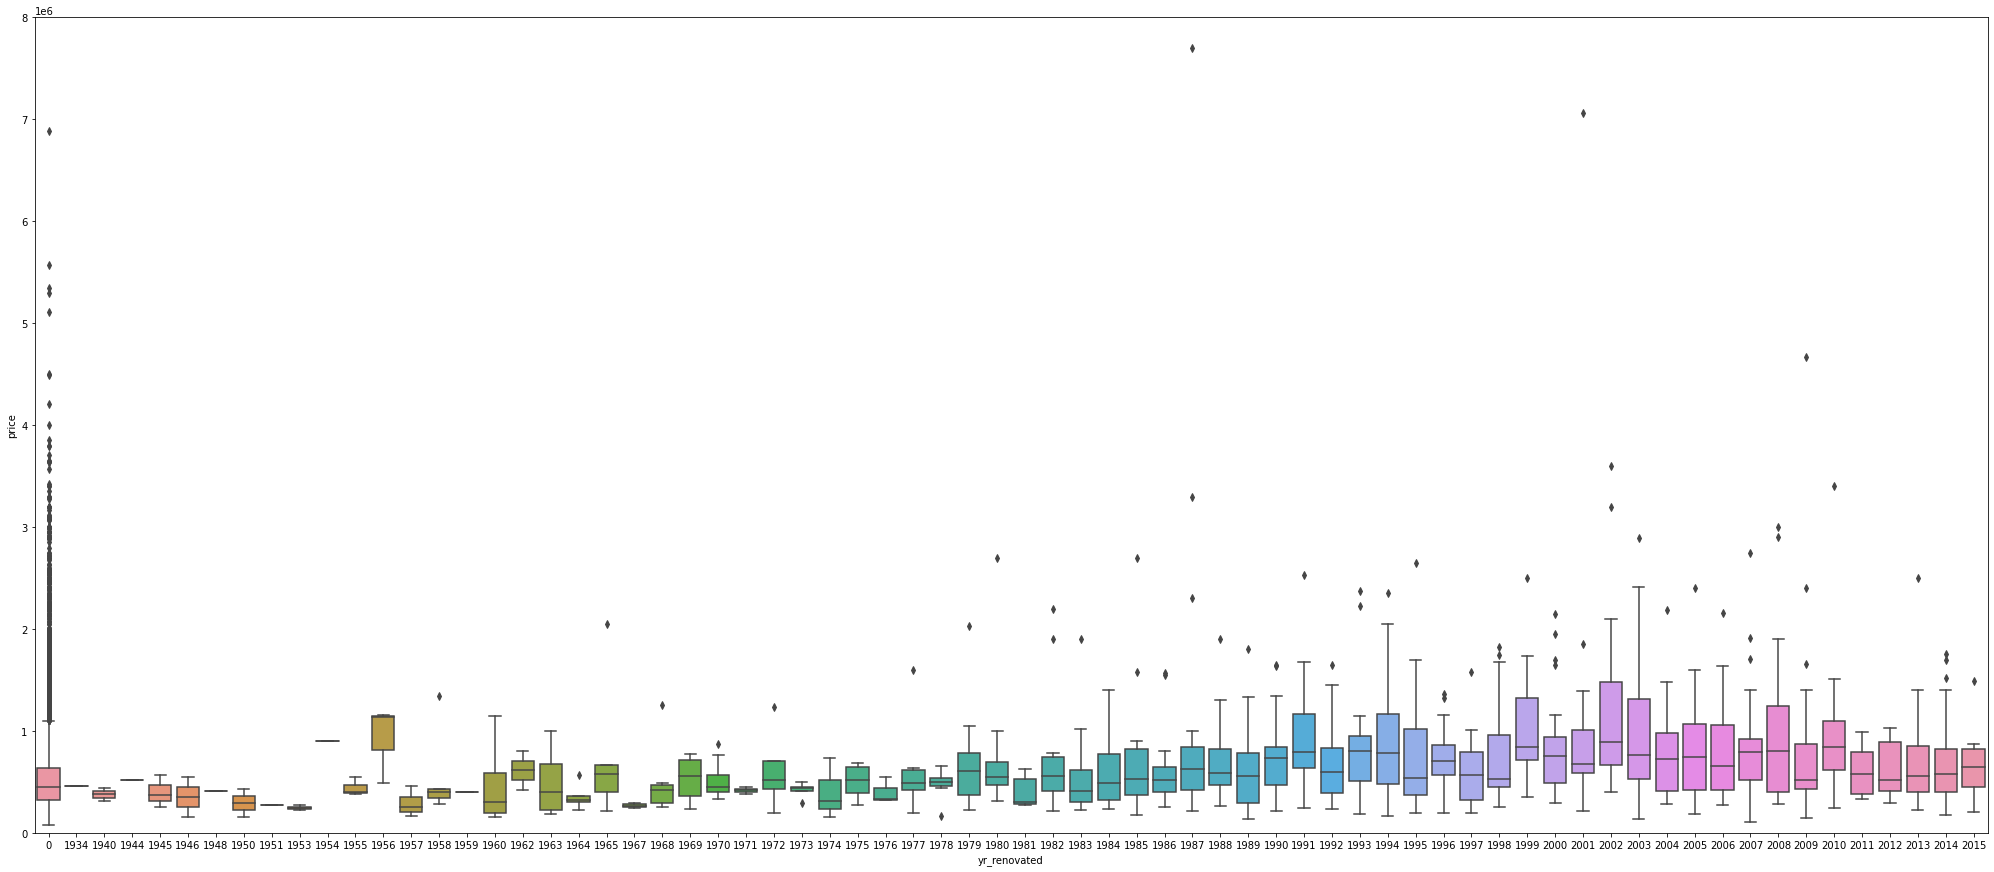

In [21]:
#box plot year of renovation/price
var = 'yr_renovated'
data = pd.concat([df_housing['price'], df_housing[var]], axis=1)
f, ax = plt.subplots(figsize=(35, 15))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

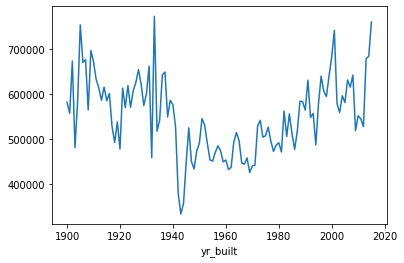

In [61]:
# the average prices per year

df_housing.groupby('yr_built')['price'].mean().plot()

The house prices were lowest between 1940 to early 1990s

# **Regression Models**

**Multiple linear regression**

In [51]:
# We will need to first split up our data into an X array that contains the features
# to train on, and a y array with the target variable, in this case the price 
X = df2_housing[['sqft_living', 'floors', 'waterfront', 'sqft_basement', 'yr_renovated'
]]
y = df2_housing['price']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [24]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression() 
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print(lm.intercept_)

-50277.69985249732


In [26]:
# cumulative distribution function coefficients
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff']).round(4) 
cdf 

,Coeff
sqft_living,263.4388
floors,17183.2766
waterfront,784231.5684
sqft_basement,19.4623
yr_renovated,63.2579


interpreting the coefficients;
- Holding all the other factors constant,1 unit increase in sqft_living is 
associated with $263.4388 increase in price.




In [27]:
predictions = lm.predict(X_test)

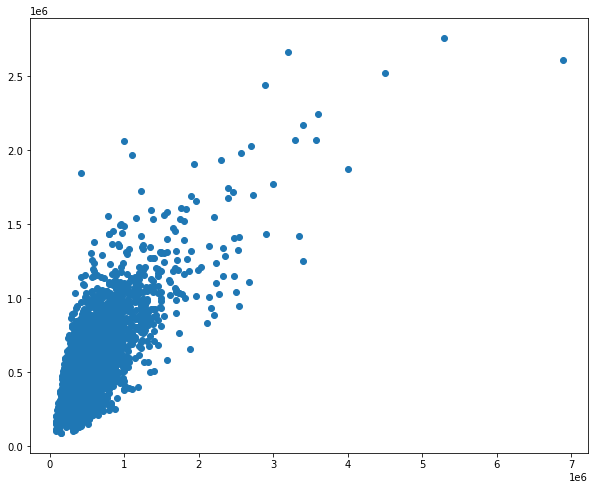

In [64]:
# creating a residual plot for the predicted prices
plt.figure(figsize=(10,8))
plt.scatter(y_test,predictions)
plt.show()

the residuals take a cone like shape

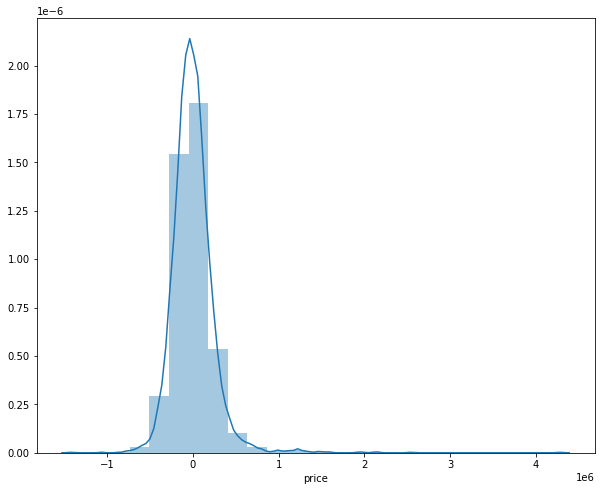

In [29]:
plt.figure(figsize=(10,8))
sns.distplot((y_test-predictions),bins=25)
plt.show()

Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors. 

Mean Squared Error (MSE) is the mean of the squared errors.

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.
 
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.


In [30]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 166500.37804929406
MSE: 61234419869.8354
RMSE: 247455.894797104


This values indicate that our model is not performing well

**Ridge Regression**

[247456.0496609292, 247456.359577244, 247457.44626174055, 247460.56793534686, 247471.68709490253, 247505.02869526407, 247637.13554320962, 248092.1376217465]


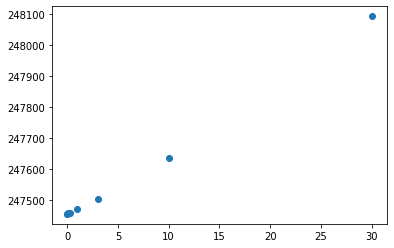

In [31]:
# Import Ridge regression from sklearn
from sklearn.linear_model import Ridge
# Evaluate model performance using root mean square error
from sklearn.metrics import mean_squared_error
rmse=[]
# check the below alpha values for Ridge Regression
alpha=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

for alph in alpha:
    ridge=Ridge(alpha=alph, copy_X=True, fit_intercept=True)
    ridge.fit(X_train, y_train)
    predict=ridge.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(predict, y_test)))
print(rmse)
plt.scatter(alpha, rmse)

In [32]:
rmse=pd.Series(rmse, index=alpha)
rmse.argmin()

0

[247597.2515914592, 247607.0786995129, 247617.00359634755, 247627.02346252833, 247637.13554320962, 247647.33714657495, 247657.62564231886, 247667.9984601683, 247678.45308844335, 247688.98707265587, 247699.59801414458, 247710.283568746, 247721.04144550022, 247731.8694053898]
0


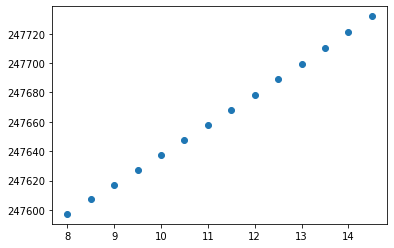

In [35]:
# Adjusting the alpha based on previous result
alpha=np.arange(8,15, 0.5)
rmse=[]

for alph in alpha:
    ridge=Ridge(alpha=alph, copy_X=True, fit_intercept=True)
    ridge.fit(X_train, y_train)
    predict=ridge.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(predict, y_test)))
print(rmse)
plt.scatter(alpha, rmse)
rmse=pd.Series(rmse, index=alpha)
print(rmse.argmin())

**Lasso Regression**

In [36]:
#before buliding the model we need to first scale the data 
#Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler
# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [37]:
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.5361798577343214
lasso MSE: 62591955442.93559
lasso coef: [242726.04807181   8582.78587937  69377.12882885   8033.45798188
  25938.54640593]


In [39]:
# building Lasso, and choosing the regularization parameter with the help of GridSearch. 
# also we'll define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 2.0}
lasso score: 0.5517951347015393
linear score: 0.5517974278331503
lasso MSE: 61234733162.51288
linear MSE: 61234419869.8354
lasso best estimator coef: [2.63444219e+02 1.71734046e+04 7.83970392e+05 1.94580693e+01
 6.32630053e+01]
linear coef: [2.63438780e+02 1.71832766e+04 7.84231568e+05 1.94622554e+01
 6.32579325e+01]


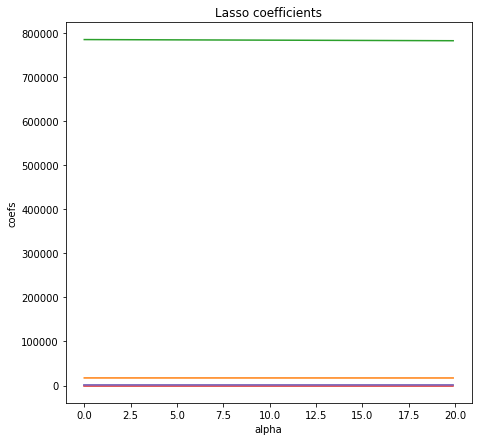

In [43]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable

**Elastic net regression**

In [44]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 

62591955438.77729


In [54]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'floors': 8584.200068291495,
 'sqft_basement': 8034.796432334355,
 'sqft_living': 242725.78283716572,
 'waterfront': 69377.93210271094,
 'yr_renovated': 25939.38205226433}

In [48]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [49]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

62894761805.432755

In [50]:
#we will set our hyperparameters to the recommended values and run on the data. 
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

108661949696.69873


**Quantile regression**

In [68]:
# importing statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ X', data)
res = mod.fit(q=.5)
# summary
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2657
Model:                       QuantReg   Bandwidth:                   3.067e+04
Method:                 Least Squares   Sparsity:                    4.624e+05
Date:                Fri, 25 Sep 2020   No. Observations:                21613
Time:                        14:01:41   Df Residuals:                    21607
                                        Df Model:                            5
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5588.2353   5239.038      1.067      0.286   -4680.666    1.59e+04
X[0]         200.9804      2.244     89.564      0.000     196.582     205.379
X[1]        4.353e+04   3538.446     12.302      0.000    3.66e+04    5.05e+04
X[2]        7.276e+05   1.84e+04     39.627      0.0